In [2]:
#put all libraries on top
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import scipy as imposp
from scipy import stats
import plotly.offline as po
import plotly.graph_objs as go
import dexplot as dxp
from numpy import median
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy import stats
import scipy as sp
from datetime import date

In [3]:
import pandas as pd
df=pd.read_csv('merged.csv', usecols=['livingAreaValue','zipcode','bathrooms','bedrooms',
'annualHomeownersInsurance','yearBuilt','resoFacts.yearBuiltEffective','price','monthlyHoaFee','solarPotential.sunScore',
'resoFacts.hasGarage','resoFacts.waterViewYN','resoFacts.architecturalStyle','resoFacts.daysOnZillow',
'resoFacts.bathroomsHalf','resoFacts.bathroomsFull','resoFacts.hasOpenParking','resoFacts.subdivisionName',
'resoFacts.hasView','resoFacts.hasAttachedGarage','resoFacts.propertyCondition','resoFacts.isNewConstruction',
'resoFacts.taxAnnualAmount','listed_by.rating_average','resoFacts.pricePerSquareFoot','walkScore.walkscore',
'transitScore.transit_score','mortgage','citylabel','State','schools'])

In [4]:
df['elementary school score']=df['schools'].str.split(',', expand=True)[1].str.split(':', expand=True)[1]
#df['elementary school']=df['schools'].str.split(',', expand=True)[5].str.split(':', expand=True)[1]

In [5]:
df['elementary school score'] = df['elementary school score'].replace(" None", 
np.median(pd.to_numeric(df['elementary school score'], errors='coerce')))

In [6]:
df["elementary school score"] = df["elementary school score"].fillna(value=df["elementary school score"].median())

In [7]:
#I don't want to bias my model with imputations.

#numerical
df['bathrooms'].fillna((df['bathrooms'].median()), inplace=True)
df['bedrooms'].fillna((df['bedrooms'].median()), inplace=True)
df['resoFacts.bathroomsFull'].fillna((df['resoFacts.bathroomsFull'].median()), inplace=True)
df['walkScore.walkscore'].fillna((df['walkScore.walkscore'].median()), inplace=True)
df['elementary school score']=df['elementary school score'].astype(int)
df['yearBuilt']=df['yearBuilt'].astype('Int64')
df['resoFacts.yearBuiltEffective']=df['resoFacts.yearBuiltEffective'].astype('Int64')
df['zipcode']=df['zipcode'].astype('int')

#bool to numerical
df['resoFacts.waterViewYN']=df['resoFacts.waterViewYN'].astype('bool').astype(int)
df['resoFacts.hasOpenParking']=df['resoFacts.hasOpenParking'].astype('bool').astype(int)
df['resoFacts.hasAttachedGarage']=df['resoFacts.hasAttachedGarage'].astype('bool').astype(int)
df['resoFacts.isNewConstruction']=df['resoFacts.isNewConstruction'].astype('bool').astype(int)
df['resoFacts.hasGarage']=df['resoFacts.hasGarage'].astype('int')
df['resoFacts.hasView']=df['resoFacts.hasView'].astype('int')

#categorical
df['schools'].fillna((df['schools'].fillna("Unknown")), inplace=True)
df['resoFacts.waterViewYN'].fillna((df['resoFacts.waterViewYN'].fillna("Unknown")), inplace=True)
df['resoFacts.architecturalStyle'].fillna((df['resoFacts.architecturalStyle'].fillna("Unknown")), inplace=True)
df['resoFacts.hasOpenParking'].fillna((df['resoFacts.hasOpenParking'].fillna("Unknown")), inplace=True)
df['resoFacts.subdivisionName'].fillna((df['resoFacts.subdivisionName'].fillna("Unknown")), inplace=True)
df['resoFacts.hasAttachedGarage'].fillna((df['resoFacts.hasAttachedGarage'].fillna("Unknown")), inplace=True)
df['resoFacts.propertyCondition'].fillna((df['resoFacts.propertyCondition'].fillna("Unknown")), inplace=True)
df['resoFacts.isNewConstruction'].fillna((df['resoFacts.isNewConstruction'].fillna("Unknown")), inplace=True)

In [8]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

livingAreaValue has 2842 null values
yearBuilt has 801 null values
resoFacts.yearBuiltEffective has 14017 null values
solarPotential.sunScore has 8824 null values
resoFacts.bathroomsHalf has 1293 null values
resoFacts.taxAnnualAmount has 6456 null values
listed_by.rating_average has 3584 null values
resoFacts.pricePerSquareFoot has 2900 null values
transitScore.transit_score has 3815 null values


In [9]:
pd.set_option('display.max_columns', None)
df.dtypes

livingAreaValue                 float64
zipcode                           int32
bathrooms                       float64
bedrooms                        float64
annualHomeownersInsurance         int64
yearBuilt                         Int64
resoFacts.yearBuiltEffective      Int64
price                             int64
monthlyHoaFee                     int64
solarPotential.sunScore         float64
resoFacts.hasGarage               int32
resoFacts.waterViewYN             int32
resoFacts.architecturalStyle     object
resoFacts.daysOnZillow            int64
resoFacts.bathroomsHalf         float64
resoFacts.bathroomsFull         float64
resoFacts.hasOpenParking          int32
resoFacts.subdivisionName        object
resoFacts.hasView                 int32
resoFacts.hasAttachedGarage       int32
resoFacts.propertyCondition      object
resoFacts.isNewConstruction       int32
resoFacts.taxAnnualAmount       float64
listed_by.rating_average        float64
schools                          object


In [10]:
df1=df[['resoFacts.architecturalStyle','resoFacts.subdivisionName','resoFacts.propertyCondition',
    'schools','citylabel','State']]
df.drop(columns=['resoFacts.architecturalStyle','resoFacts.subdivisionName','resoFacts.propertyCondition',
    'schools','citylabel','State'],inplace=True)

In [11]:
# Used KNN Inputer
#https://towardsdatascience.com/imputing-numerical-data-top-5-techniques-every-data-scientist-must-know-587c0f51552a
data_original = df

# Scaled dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_original)
data_scaled = pd.DataFrame(data=data_scaled, columns=data_original.columns)
data_scaled.head()

imputer_orig = KNNImputer(n_neighbors=5)
imputed_orig = imputer_orig.fit_transform(data_original)

imputer_scaled = KNNImputer(n_neighbors=5)
imputed_scaled = imputer_scaled.fit_transform(data_scaled)

# Convert to DataFrames
imputed_orig = pd.DataFrame(data=imputed_orig, columns=data_original.columns)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

# Inverse the scaling
imputed_scaled = scaler.inverse_transform(imputed_scaled)
df = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

In [12]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

In [13]:
df = pd.concat([df, df1], axis=1, join='inner')

In [14]:
df=df[df['price']<=5995000]

In [15]:
df.drop(columns=['schools'], inplace=True)

In [16]:
#df.to_csv(r'C:\Users\debbi\OneDrive\Desktop\2-25-22\test.csv', index = False)
df.shape

(13920, 31)

In [17]:
##Validated above 4/28/22

In [18]:
df2=pd.read_csv('uszips.csv')
df2['zipcode']=df2['zip']
df['zipcode']=df['zipcode'].astype('int')
df3 = pd.merge(df, df2, how='left', on=['zipcode'])

In [19]:
df3.drop(columns=['zip','parent_zcta','cbsa_fips','cbsa_name','cbsa_metro','csa_fips','csa_name',
                  'city','state_id','state_name','zcta',
                  'state_id','state_name','county_fips','county_name','county_weights','county_names_all',
                  'county_fips_all','imprecise','military','timezone',
                  'self_employed','charitable_givers',
                  'city','zcta',
                  'home_value','rent_median','rent_burden',
                  'lat','lng'
],inplace=True)

In [20]:
#df3.to_csv(r'C:\Users\debbi\OneDrive\Desktop\2-25-22\test2.csv', index = False)

In [21]:
for column in df3:
    if df3[column].isnull().any():
       print('{0} has {1} null values'.format(column, df3[column].isnull().sum()))

population has 576 null values
density has 576 null values
age_median has 692 null values
age_under_10 has 692 null values
age_10_to_19 has 692 null values
age_20s has 692 null values
age_30s has 692 null values
age_40s has 692 null values
age_50s has 692 null values
age_60s has 692 null values
age_70s has 692 null values
age_over_80 has 692 null values
male has 692 null values
female has 692 null values
married has 692 null values
divorced has 692 null values
never_married has 692 null values
widowed has 692 null values
family_size has 692 null values
family_dual_income has 692 null values
income_household_median has 693 null values
income_household_under_5 has 692 null values
income_household_5_to_10 has 692 null values
income_household_10_to_15 has 692 null values
income_household_15_to_20 has 692 null values
income_household_20_to_25 has 692 null values
income_household_25_to_35 has 692 null values
income_household_35_to_50 has 692 null values
income_household_50_to_75 has 692 null

In [22]:
df3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13920 entries, 0 to 13919
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   livingAreaValue               13920 non-null  float64
 1   zipcode                       13920 non-null  int32  
 2   bathrooms                     13920 non-null  float64
 3   bedrooms                      13920 non-null  float64
 4   annualHomeownersInsurance     13920 non-null  float64
 5   yearBuilt                     13920 non-null  float64
 6   resoFacts.yearBuiltEffective  13920 non-null  float64
 7   price                         13920 non-null  float64
 8   monthlyHoaFee                 13920 non-null  float64
 9   solarPotential.sunScore       13920 non-null  float64
 10  resoFacts.hasGarage           13920 non-null  float64
 11  resoFacts.waterViewYN         13920 non-null  float64
 12  resoFacts.daysOnZillow        13920 non-null  float64
 13  r

In [23]:
#df4 stores categorical variables
df4=df3[['resoFacts.architecturalStyle','resoFacts.subdivisionName','resoFacts.propertyCondition','citylabel','State']]
df3.drop(columns=['resoFacts.architecturalStyle','resoFacts.subdivisionName','resoFacts.propertyCondition',
    'citylabel','State'],inplace=True)

In [24]:
# Used KNN Inputer
#https://towardsdatascience.com/imputing-numerical-data-top-5-techniques-every-data-scientist-must-know-587c0f51552a
data_original = df3

# Scaled dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_original)
data_scaled = pd.DataFrame(data=data_scaled, columns=data_original.columns)
data_scaled.head()

imputer_orig = KNNImputer(n_neighbors=5)
imputed_orig = imputer_orig.fit_transform(data_original)

imputer_scaled = KNNImputer(n_neighbors=5)
imputed_scaled = imputer_scaled.fit_transform(data_scaled)

# Convert to DataFrames
imputed_orig = pd.DataFrame(data=imputed_orig, columns=data_original.columns)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

# Inverse the scaling
imputed_scaled = scaler.inverse_transform(imputed_scaled)
df3 = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

In [25]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

In [26]:
df5 = pd.concat([df3, df4], axis=1, join='inner')
df5.shape

(13920, 90)

In [27]:
#df5.to_csv(r'C:\Users\debbi\OneDrive\Desktop\2-25-22\test2.csv', index = False)

In [28]:
df=df5.drop(['resoFacts.architecturalStyle',
              'resoFacts.subdivisionName','resoFacts.propertyCondition',
           'resoFacts.pricePerSquareFoot','mortgage','annualHomeownersInsurance',
           'resoFacts.yearBuiltEffective','resoFacts.hasView','resoFacts.hasGarage',
           'resoFacts.hasOpenParking','resoFacts.daysOnZillow',
           'family_size','disabled','veteran','age_median','zipcode',
           'income_household_under_5','income_household_5_to_10','income_household_10_to_15',
           'income_household_15_to_20','income_household_20_to_25','income_household_25_to_35',
           'income_household_35_to_50','income_individual_median','population','income_household_six_figure',
           'farmer','health_uninsured','race_native','family_dual_income','unemployment_rate'
             ], axis=1)

In [29]:
#If the absolute value of skew<0.5 then very symmetric.
#· If the absolute value of skew is in between 0.5 and 1 then slightly skewed
#· If the absolute value of skew is greater than 1 then very skewed.
#A negative skewness means the tail is larger towards the left hand side of the distribution.
#A positive skewness means the tail is larger towards the right hand side of the distribution.
#df.skew()

In [30]:
#df["resoFacts.waterViewYN"] = df["resoFacts.waterViewYN"] #.astype(int)
#df['resoFacts.hasGarage']  = df['resoFacts.hasGarage']#.replace({True: 1, False: 0})
#df['resoFacts.hasView']= df['resoFacts.hasView']#.replace({True: 1, False: 0})#.astype(int)
#df['resoFacts.isNewConstruction']=df['resoFacts.isNewConstruction']#.replace({True: 1, False: 0}) #.astype(int)

In [31]:
df

,livingAreaValue,bathrooms,bedrooms,yearBuilt,price,monthlyHoaFee,solarPotential.sunScore,resoFacts.waterViewYN,resoFacts.bathroomsHalf,resoFacts.bathroomsFull,resoFacts.hasAttachedGarage,resoFacts.isNewConstruction,resoFacts.taxAnnualAmount,listed_by.rating_average,walkScore.walkscore,transitScore.transit_score,elementary school score,density,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,income_household_median,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,home_ownership,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,race_white,race_black,race_asian,race_pacific,race_other,race_multiple,hispanic,poverty,limited_english,commute_time,citylabel,State
0,943.0,2.0,2.0,1900.0,275000.0,148.0,88.830,0.0,0.4,2.0,0.0,0.0,3202.0,5.0,96.0,78.0,2.0,8082.5,7.0,3.3,27.1,24.2,10.2,10.0,9.5,5.5,3.0,48.4,51.6,35.8,9.2,51.3,3.8,84308.0,16.6,14.4,18.5,24.8,41.9,3.9,12.2,10.4,36.9,36.6,73.5,44.3,77.2,70.1,17.4,8.4,0.0,0.9,3.2,4.4,10.1,2.0,31.0,Philadelphia,Pennsylvania
1,1230.0,2.0,2.0,1960.0,105000.0,893.0,66.460,0.0,1.0,1.0,0.0,0.0,1304.0,4.6,48.0,46.0,2.0,3272.2,12.4,13.8,16.0,12.2,10.0,12.7,10.7,6.8,5.2,44.5,55.5,21.5,15.0,55.6,7.8,37345.0,14.9,10.5,9.2,3.7,48.8,10.7,29.9,32.0,15.2,12.3,27.5,42.4,50.2,12.4,80.7,3.5,0.2,0.9,2.0,3.6,30.2,2.4,34.7,Philadelphia,Pennsylvania
2,746.0,1.0,1.0,1900.0,275000.0,253.0,93.630,0.0,0.4,1.0,0.0,0.0,4213.0,4.9,99.0,100.0,7.0,14630.6,4.0,2.6,26.7,21.6,8.0,10.5,12.0,8.4,6.2,43.3,56.7,33.9,9.3,51.2,5.6,76103.0,16.5,11.3,13.3,26.5,33.1,2.6,6.0,9.7,37.4,44.3,81.7,51.7,70.4,75.7,6.6,12.2,0.1,0.5,4.8,5.0,9.1,3.7,25.0,Philadelphia,Pennsylvania
3,799.0,1.0,1.0,1880.0,289000.0,465.0,91.890,0.0,0.4,1.0,0.0,0.0,3825.0,5.0,98.0,94.0,7.0,6052.4,5.0,2.0,25.0,19.7,11.8,11.5,12.0,7.6,5.3,49.5,50.5,38.0,12.0,46.1,3.9,107388.0,16.7,11.8,19.3,34.1,49.1,3.3,8.6,10.3,37.1,40.7,77.8,46.7,66.8,83.5,8.2,5.5,0.1,0.3,2.2,5.7,7.4,1.7,29.2,Philadelphia,Pennsylvania
4,660.0,1.0,1.0,1900.0,260000.0,213.0,87.008,0.0,0.4,1.0,0.0,0.0,722.0,0.0,99.0,100.0,7.0,6052.4,5.0,2.0,25.0,19.7,11.8,11.5,12.0,7.6,5.3,49.5,50.5,38.0,12.0,46.1,3.9,107388.0,16.7,11.8,19.3,34.1,49.1,3.3,8.6,10.3,37.1,40.7,77.8,46.7,66.8,83.5,8.2,5.5,0.1,0.3,2.2,5.7,7.4,1.7,29.2,Philadelphia,Pennsylvania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,2075.0,4.0,3.0,2019.0,4540000.0,0.0,87.420,1.0,1.0,3.0,1.0,0.0,29442.4,0.0,99.0,100.0,8.0,30123.9,6.7,9.8,21.5,17.0,12.8,8.6,11.6,6.5,5.5,47.6,52.4,34.6,8.4,50.9,6.1,95702.0,7.3,6.8,15.8,33.5,25.9,17.7,11.8,11.2,36.5,22.9,59.4,43.2,64.7,53.1,9.3,29.8,0.0,2.6,5.0,11.7,18.6,17.6,27.4,Manhattan,New York
13916,1866.0,3.0,2.0,1990.0,4280000.0,0.0,87.948,1.0,1.0,2.0,1.0,0.0,30689.2,2.0,99.0,100.0,10.0,46219.5,9.7,3.6,35.0,28.3,14.7,7.2,0.5,0.9,0.0,47.2,52.8,34.8,6.5,58.2,0.5,189702.0,6.2,5.2,16.3,62.8,21.1,0.2,4.4,5.0,51.0,39.3,90.3,40.2,91.2,75.1,1.1,17.7,0.0,2.5,3.6,6.3,9.5,0.3,24.2,Manhattan,New York
13917,1196.0,2.0,2.0,1960.0,3200000.0,0.0,92.620,1.0,0.0,2.0,1.0,0.0,13504.0,0.0,98.0,100.0,7.0,21312.8,5.6,3.6,20.1,25.4,12.6,12.0,10.9,5.9,3.9,49.2,50.8,29.9,7.9,59.3,2.9,133501.0,8.0,10.3,16.0,45.7,31.7,1.2,5.5,8.1,44.8,40.4,85.2,37.6,77.7,88.9,1.4,4.8,0.0,1.0,3.9,7.0,5.8,0.5,26.1,Manhattan,New York
13918,1454.0,3.0,2.0,2021.0,3275000.0,0.0,70.510,1.0,1.0,2.0,1.0,0.0,32032.6,0.0,100.0,100.0,7.0,29140.3,5.5,4.9,15.5,22.0,14.7,13.7,11.7,8.0,3.8,51.2,48.8,32.0,10.6,54.3,3.0,138272.0,8.0,7.9,14.4,47.7,38.5,3.5,5.6,10.3,41.3,39.4,80.7,40.0,76.4,80.6,4.4,8.8,0.0,2.9,3.2,11.9,9.9,2.9,24.3,Manhattan,New York


In [32]:
df["Water View (Y/N)"] = df["resoFacts.waterViewYN"]
df['Bedrooms']=df['bedrooms']
df['Bathrooms']=df['bathrooms']
df['Attached Garage (Y/N)']=df['resoFacts.hasAttachedGarage']
df['Elementary School Score']=df['elementary school score']

In [33]:
#Choose good dimensions
x_list=["Water View (Y/N)","Bedrooms","Bathrooms",'Attached Garage (Y/N)','Elementary School Score']

In [34]:

df['Walk_Score_Bins']=pd.cut(df['walkScore.walkscore'],bins = [0,10,20,30,40,50,60,70,80,90,100],
                             labels=['10','20','30','40','50','60','70','80','90','100'
                                    ])

In [35]:
x_list=["Walk_Score_Bins"]
#[df['citylabel']=='Manhattan']

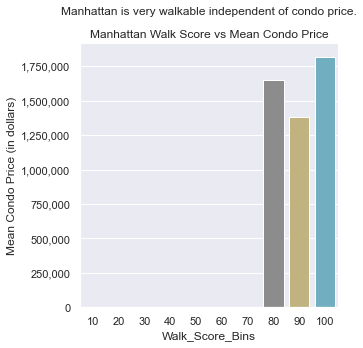

In [38]:
#bar chart
for x in x_list:
    fg=sns.catplot(data=df[df['citylabel']=='Manhattan'],x=x,y='price',kind='bar',estimator=np.mean,ci=False)
    sns.set()
    for ax in fg.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('Manhattan is very walkable independent of condo price.\n\n'
              +'Manhattan Walk Score vs Mean Condo Price')
    plt.xlabel(x)
    plt.ylabel("Mean Condo Price (in dollars)")

    plt.tight_layout()
#So that axis show
    plt.show()

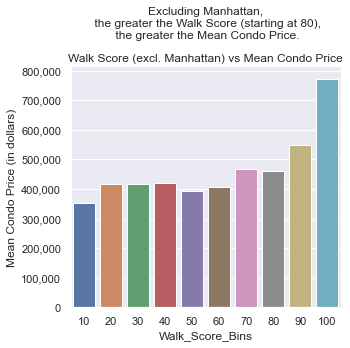

In [37]:
#bar chart
for x in x_list:
    fg=sns.catplot(data=df[df['citylabel']!='Manhattan'],x=x,y='price',kind='bar',estimator=np.mean,ci=False)
    sns.set()
    for ax in fg.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('Excluding Manhattan,\n the greater the Walk Score (starting at 80),\n the greater the Mean Condo Price.\n\n'
              +'Walk Score (excl. Manhattan) vs Mean Condo Price')
    plt.xlabel(x)
    plt.ylabel("Mean Condo Price (in dollars)")

    plt.tight_layout()
#So that axis show
    plt.show()